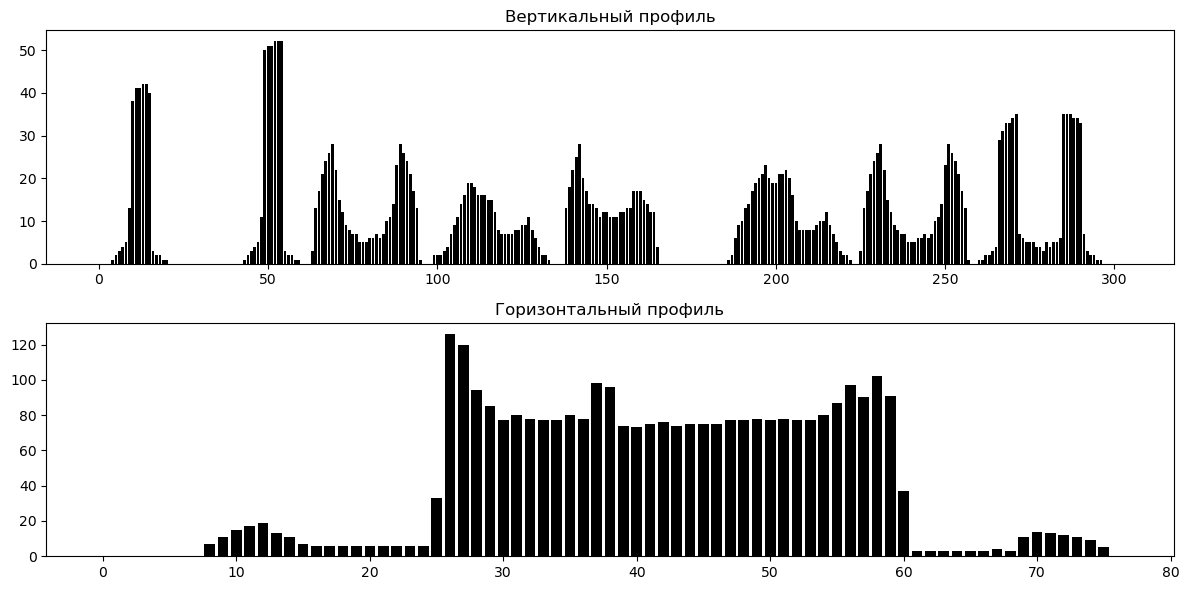

In [3]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Загрузка изображения
img = Image.open("i_love_you.bmp").convert("L")  # В оттенки серого
img_array = np.array(img)                  # В массив NumPy
binary = (img_array < 128).astype(int)     # Бинаризация: 1 - черный, 0 - белый

# Вертикальный профиль (сумма черных пикселей по столбцам)
vertical_profile = np.sum(binary, axis=0)

# Горизонтальный профиль (сумма по строкам)
horizontal_profile = np.sum(binary, axis=1)

# Вывод профилей на экран
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.bar(range(len(vertical_profile)), vertical_profile, color='black')
plt.title("Вертикальный профиль")

plt.subplot(212)
plt.bar(range(len(horizontal_profile)), horizontal_profile, color='black')
plt.title("Горизонтальный профиль")
plt.tight_layout()
plt.show()

Координаты символов (x, y): [(4, 21), (43, 60), (63, 96), (99, 134), (138, 166), (186, 223), (225, 258), (260, 297)]


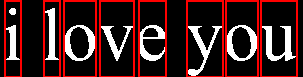

In [7]:
def segment_characters(profile, threshold=1):
    """Находит границы символов по профилю."""
    segments = []
    start = None
    for i, value in enumerate(profile):
        if value >= threshold and start is None:
            start = i
        elif value < threshold and start is not None:
            segments.append((start, i))
            start = None
    return segments

# Сегментация по вертикальному профилю
vertical_segments = segment_characters(vertical_profile)

# Визуализация: рисуем красные прямоугольники вокруг символов
output = Image.fromarray((binary * 255).astype(np.uint8)).convert("RGB")
draw = ImageDraw.Draw(output)

for (x1, x2) in vertical_segments:
    draw.rectangle([x1, 0, x2, img.height], outline="red", width=2)

# Вывод на экран
print("Координаты символов (x, y):", vertical_segments)
display(output)  # Вывод изображения в Jupyter

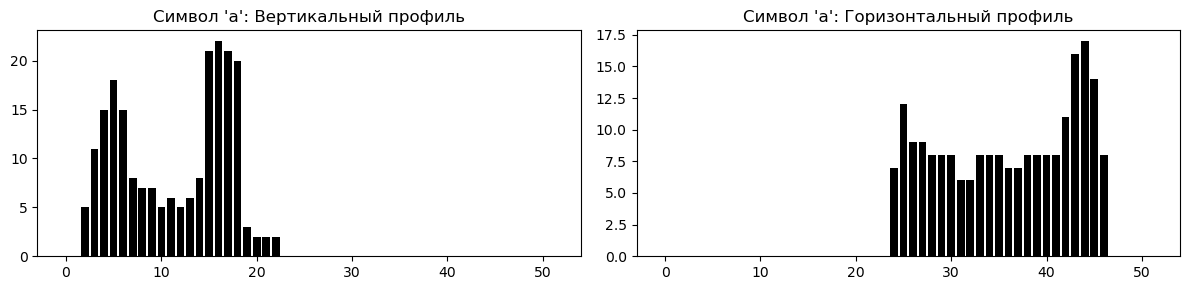

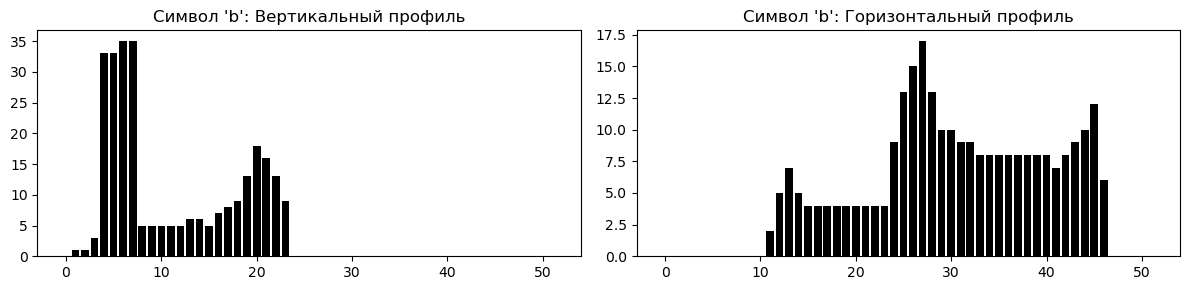

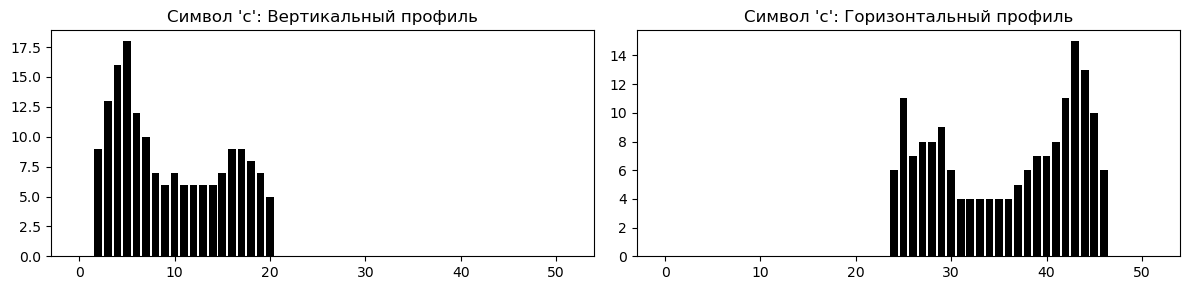

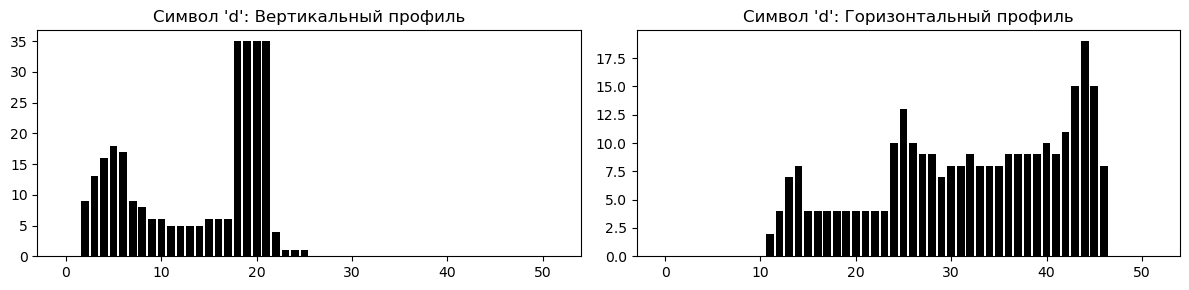

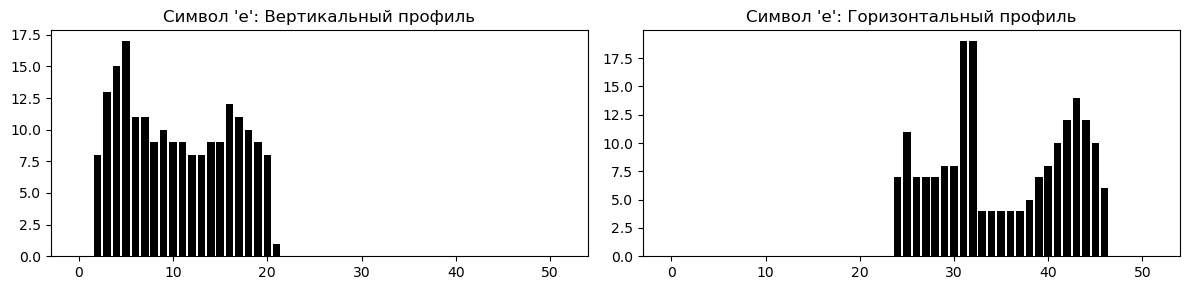

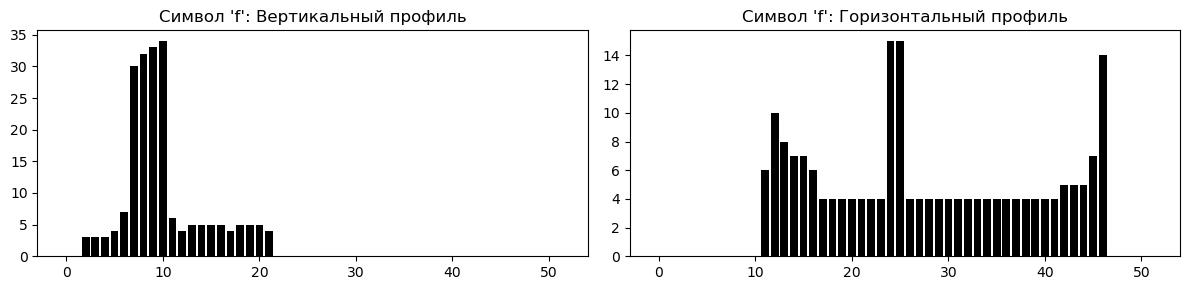

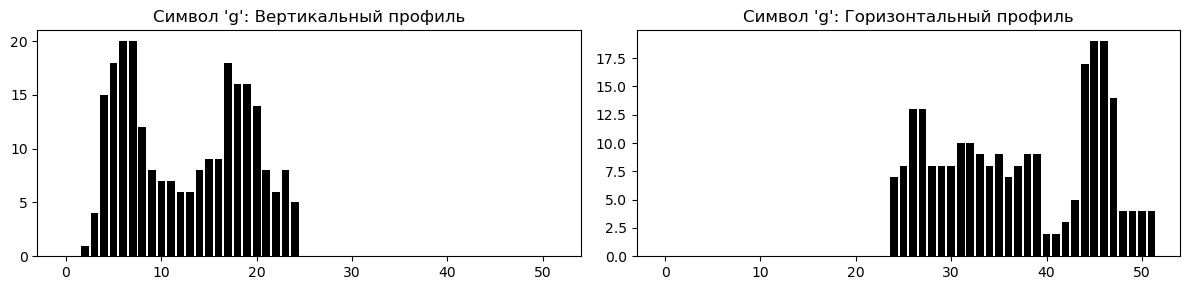

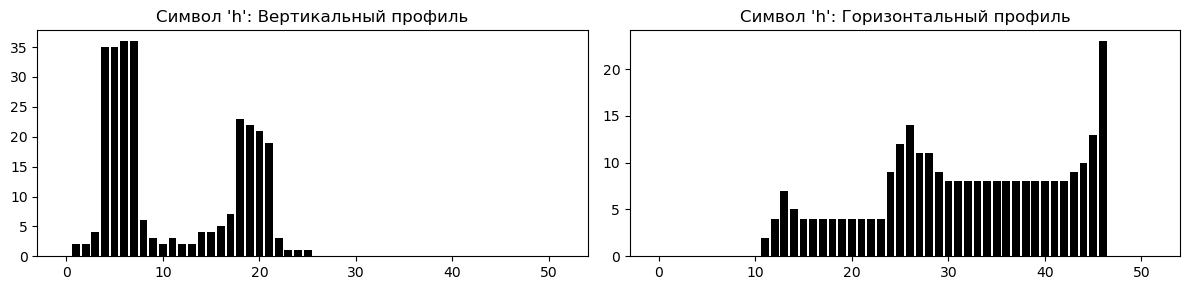

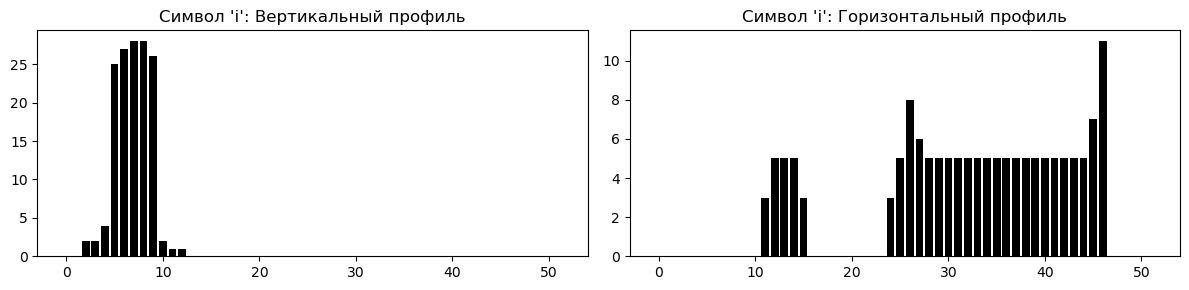

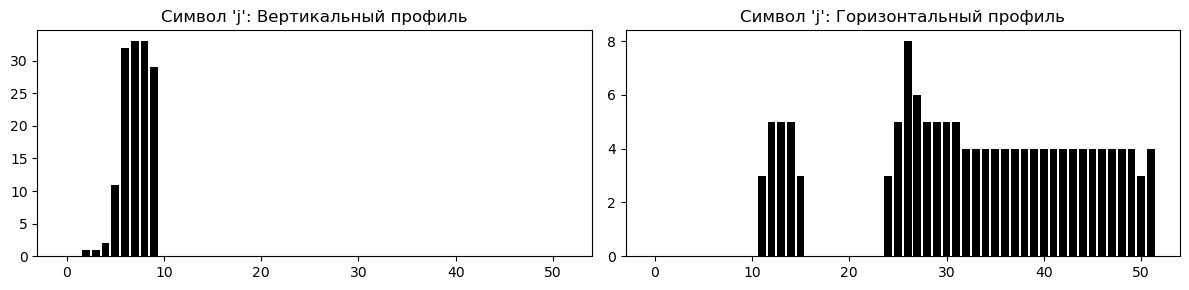

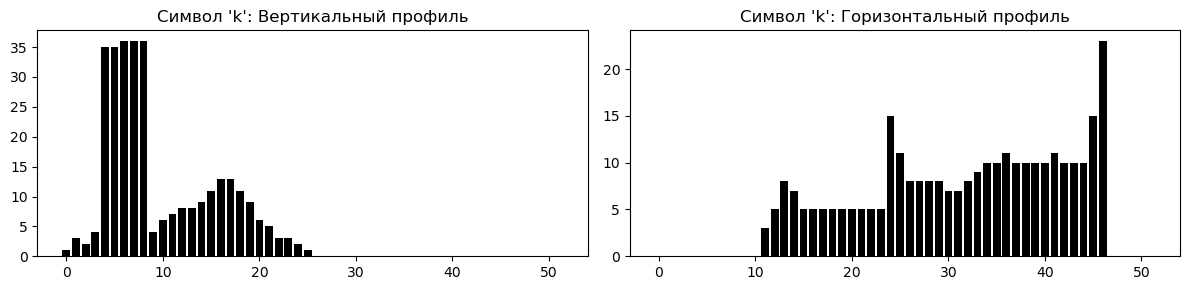

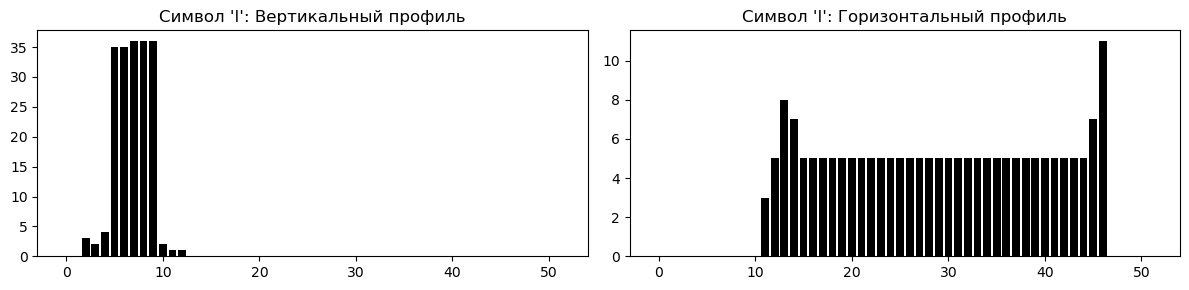

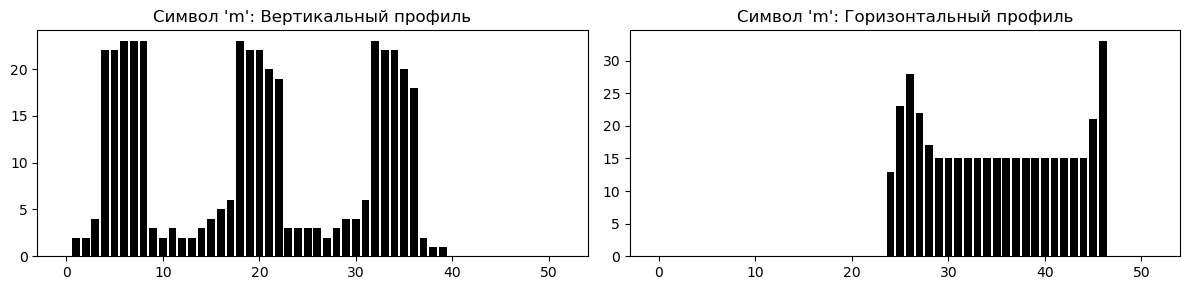

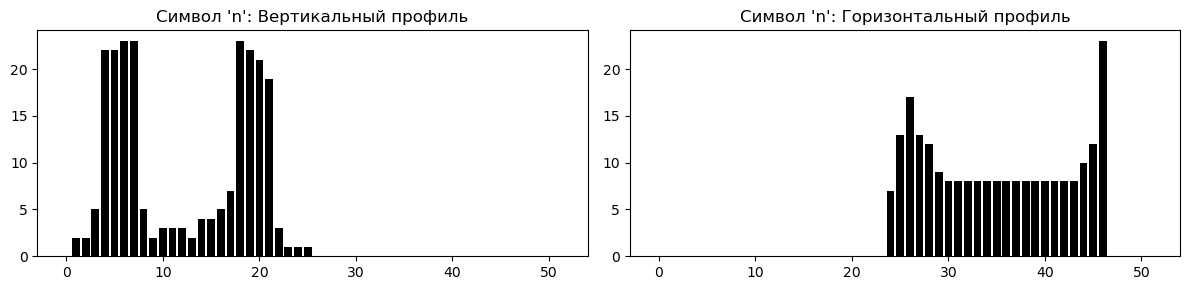

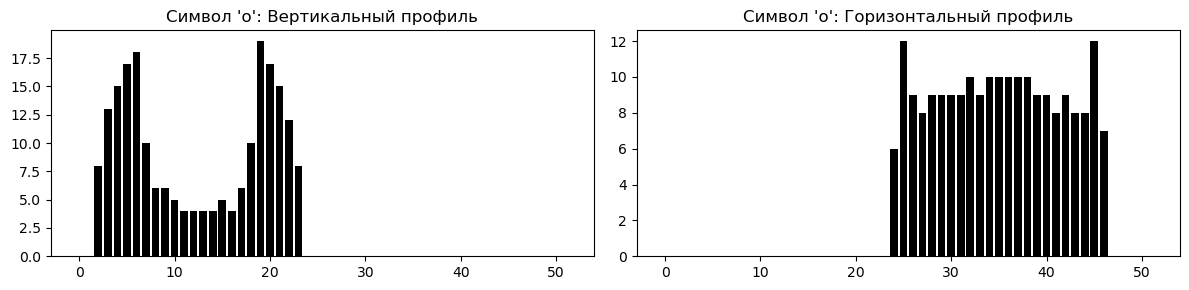

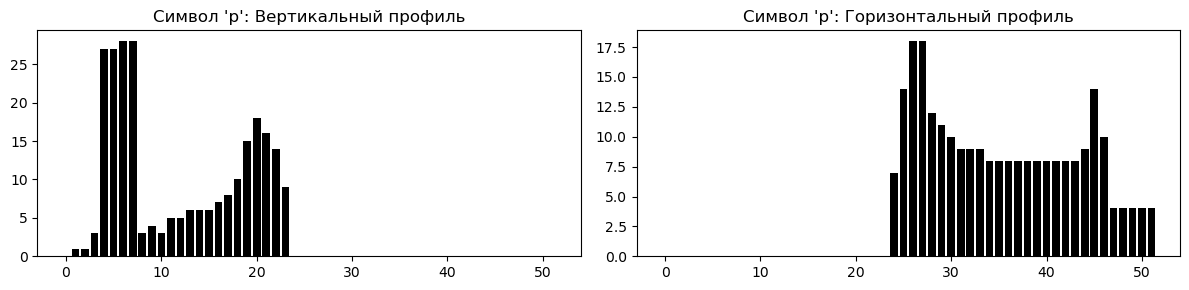

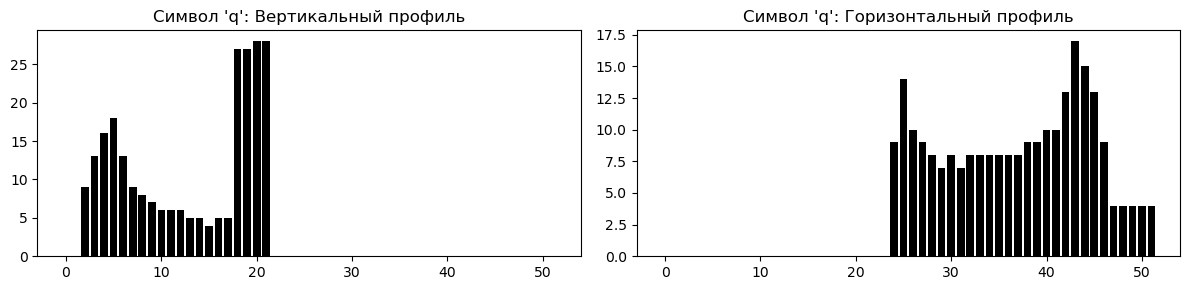

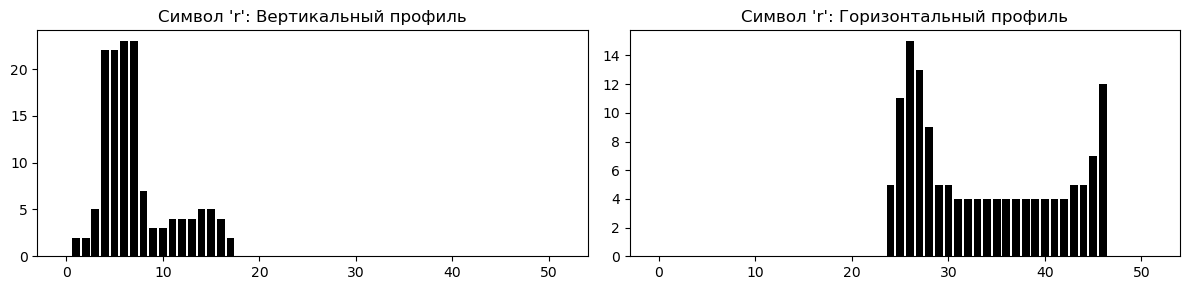

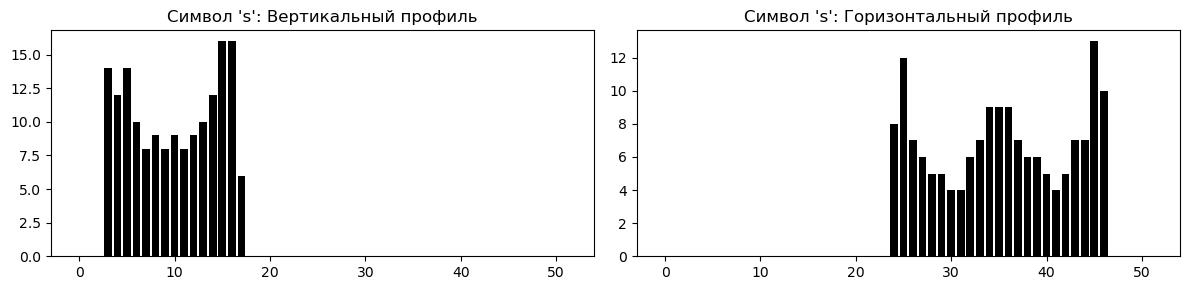

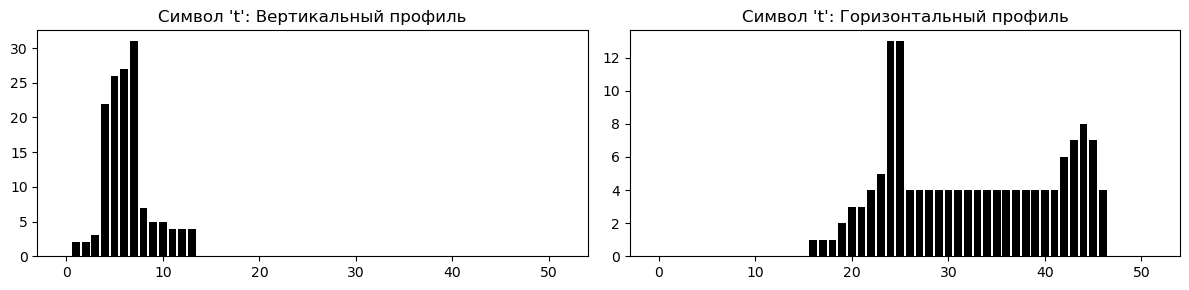

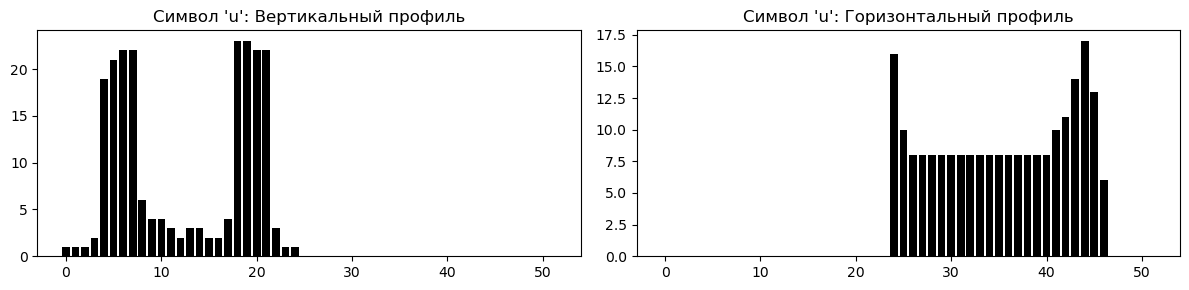

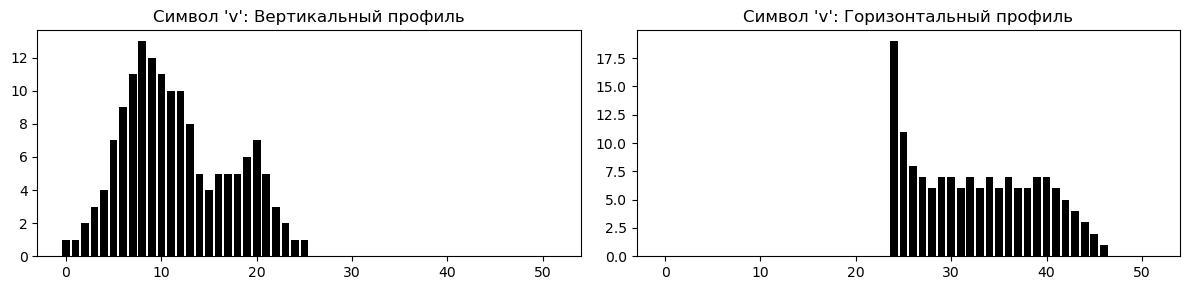

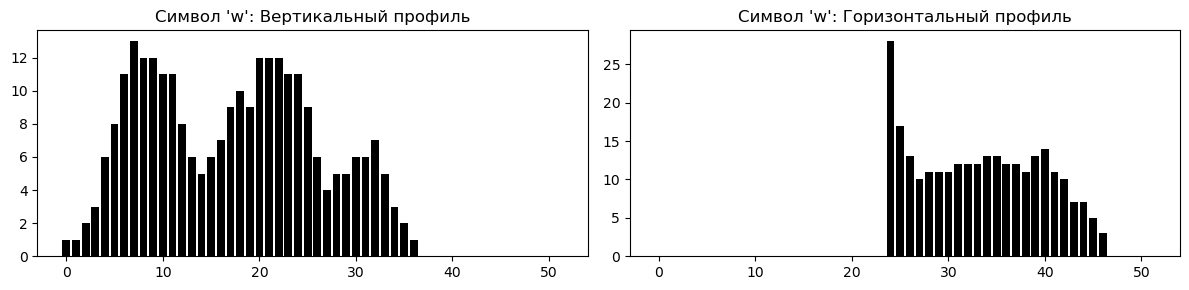

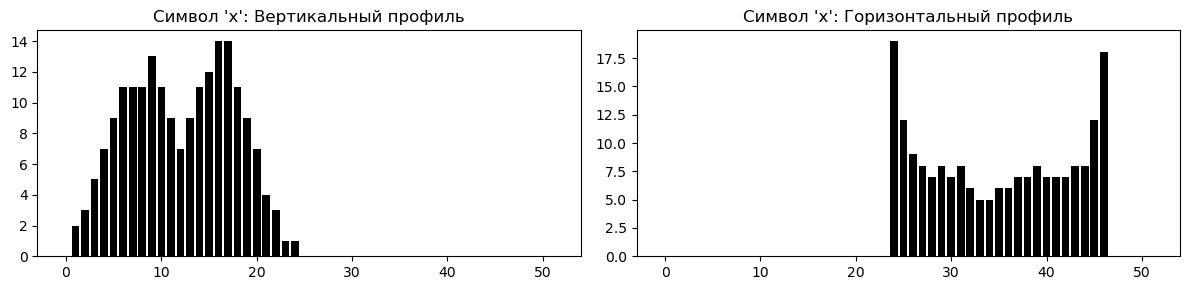

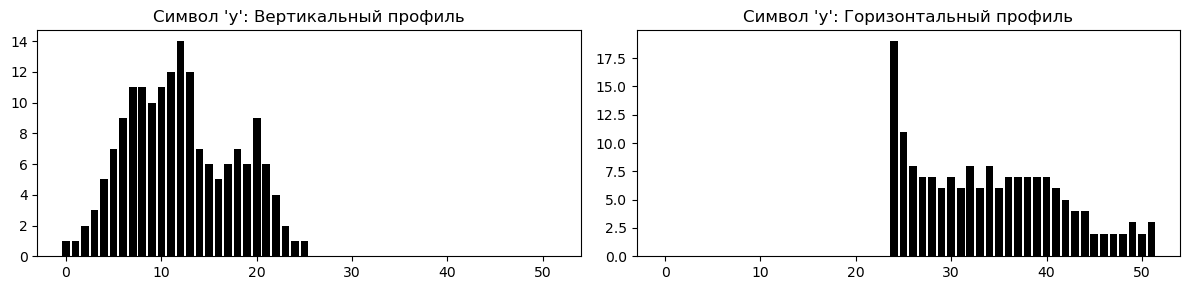

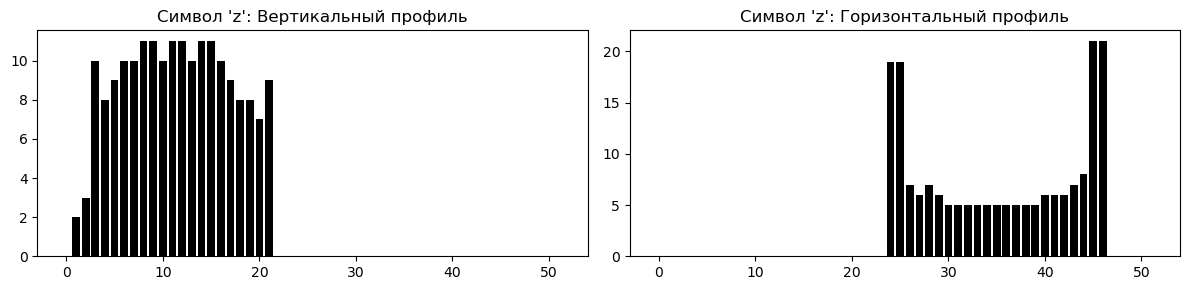

In [9]:
symbols_folder = "symbols"  # Папка с символами из ЛР5 (a.png, b.png, ...)

for char in "abcdefghijklmnopqrstuvwxyz":
    try:
        img_char = Image.open(f"{symbols_folder}/{char}.png").convert("L")
        img_char_array = np.array(img_char)
        binary_char = (img_char_array < 128).astype(int)
        
        # Вертикальный и горизонтальный профили
        vp_char = np.sum(binary_char, axis=0)
        hp_char = np.sum(binary_char, axis=1)
        
        # Вывод на экран
        plt.figure(figsize=(12, 3))
        plt.subplot(121)
        plt.bar(range(len(vp_char)), vp_char, color='black')
        plt.title(f"Символ '{char}': Вертикальный профиль")
        
        plt.subplot(122)
        plt.bar(range(len(hp_char)), hp_char, color='black')
        plt.title(f"Символ '{char}': Горизонтальный профиль")
        plt.tight_layout()
        plt.show()
        
    except FileNotFoundError:
        print(f"Файл для символа '{char}' не найден!")